# Heart Disease Predicition Machine Learning Model

### Objective: Heart disease is one of the leading causes of death in America and being able to detect heart disease promptly can have a number of benefits. In this project, we will try to detect heart disease using supervised machine learning strategies. This model is not intended to replace doctors by any means, instead this model is intended to be a tool to assist physicians in their decision making.
Data Source: https://www.kaggle.com/fedesoriano/heart-failure-prediction
##### Kaggle Project overview:
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of five CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
from matplotlib.figure import Figure
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

!pip install category_encoders

### As found in previous notebooks, there are a few rows with missing cholesterol data.  I will change missing values to the sample median.

In [123]:
heart_data=pd.read_csv("heart.csv.xls")

In [124]:
heart_data['Cholesterol']=heart_data['Cholesterol'].replace(0,heart_data['Cholesterol'].median())

## Setting up categrory encoding for the categorical data

In [125]:
import category_encoders as ce

In [126]:
encoder = ce.OneHotEncoder(use_cat_names=True)

In [127]:
y=heart_data['HeartDisease']

In [128]:
X=heart_data.drop('HeartDisease', axis='columns')

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [130]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (734, 11) (734,)
Test (184, 11) (184,)


In [131]:
encoder.fit(X_train)
X_train_enc = encoder.transform(X_train)
X_test_enc = encoder.transform(X_test)


In [132]:
print(X_train_enc)

     Age  Sex_M  Sex_F  ChestPainType_ASY  ChestPainType_NAP  \
852   43      1      0                  1                  0   
121   52      0      1                  0                  1   
664   65      0      1                  1                  0   
187   41      1      0                  1                  0   
108   50      1      0                  1                  0   
..   ...    ...    ...                ...                ...   
767   54      0      1                  0                  1   
72    52      1      0                  1                  0   
908   63      1      0                  1                  0   
235   39      1      0                  0                  0   
37    41      0      1                  0                  0   

     ChestPainType_TA  ChestPainType_ATA  RestingBP  Cholesterol  FastingBS  \
852                 0                  0        120          177          0   
121                 0                  0        125          272         

## Modeling with Logistic Regression

In [133]:
logmodel=LogisticRegression(solver='lbfgs', max_iter=9000)

In [134]:
logmodel.fit(X_train_enc, y_train)

LogisticRegression(max_iter=9000)

In [135]:
predictions=logmodel.predict(X_test_enc)

In [136]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [137]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.89      0.88      0.88        74\n           1       0.92      0.93      0.92       110\n\n    accuracy                           0.91       184\n   macro avg       0.90      0.90      0.90       184\nweighted avg       0.91      0.91      0.91       184\n'

In [138]:
confusion_matrix(y_test,predictions)

array([[ 65,   9],
       [  8, 102]])

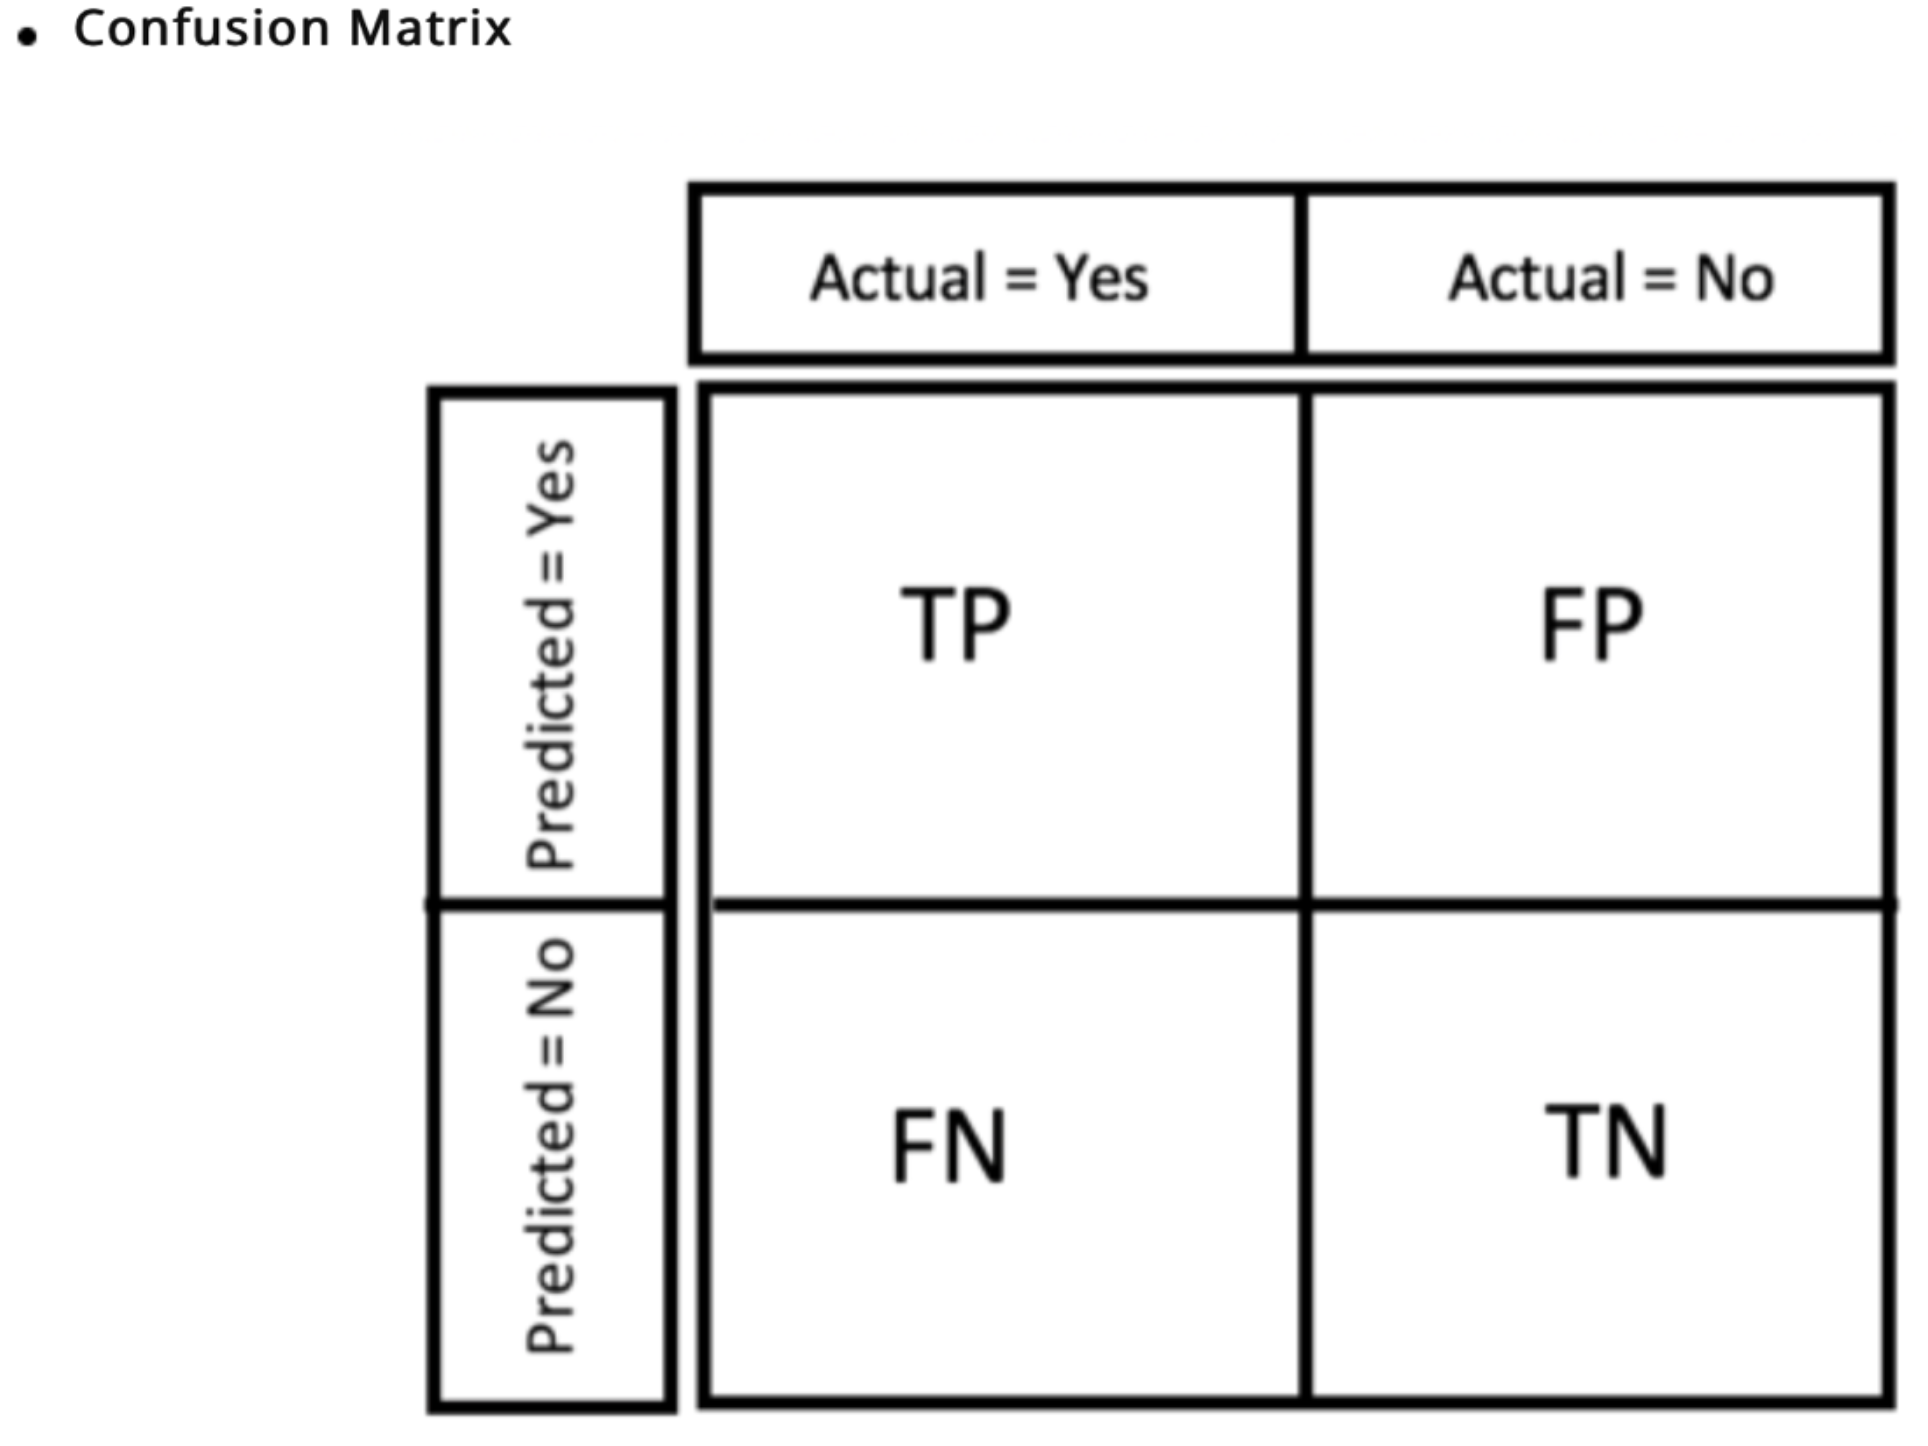

In [139]:
accuracy_score(y_test,predictions)

0.907608695652174

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

## Random Forest Model

In [141]:
RF_model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

In [142]:
RF_model.fit(X_train_enc, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [143]:
predictions=RF_model.predict(X_test_enc)

In [144]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.87      0.88      0.87        74\n           1       0.92      0.91      0.91       110\n\n    accuracy                           0.90       184\n   macro avg       0.89      0.89      0.89       184\nweighted avg       0.90      0.90      0.90       184\n'

In [145]:
confusion_matrix(y_test,predictions)

array([[ 65,   9],
       [ 10, 100]])

In [146]:
accuracy_score(y_test,predictions)

0.8967391304347826

## Feature Importance and Partial Dependence Plot

In [147]:
importances = RF_model.feature_importances_

In [148]:
RF_model.feature_importances_

array([0.082337  , 0.02551043, 0.02118442, 0.07359342, 0.01730983,
       0.0069157 , 0.03010706, 0.07832193, 0.07460923, 0.02121038,
       0.01405827, 0.01102834, 0.00963949, 0.1044042 , 0.04577428,
       0.05908577, 0.09850596, 0.11187082, 0.10994715, 0.0045863 ])

<AxesSubplot:>

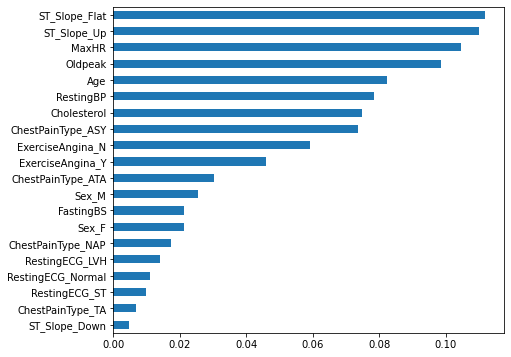

In [149]:
feature_importances = pd.Series(RF_model.feature_importances_, index=X_train_enc.columns)
sorted_features=feature_importances.sort_values()
#feature_importances.plot(kind='barh', figsize=(7,6))
sorted_features.plot(kind='barh', figsize=(7,6))

In [150]:
from sklearn.inspection import plot_partial_dependence

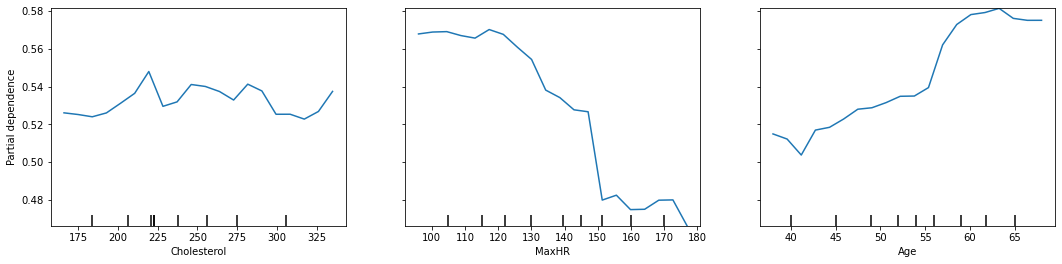

In [151]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train_enc, ['Cholesterol', "MaxHR", "Age"], 
                        grid_resolution=20, ax=ax)

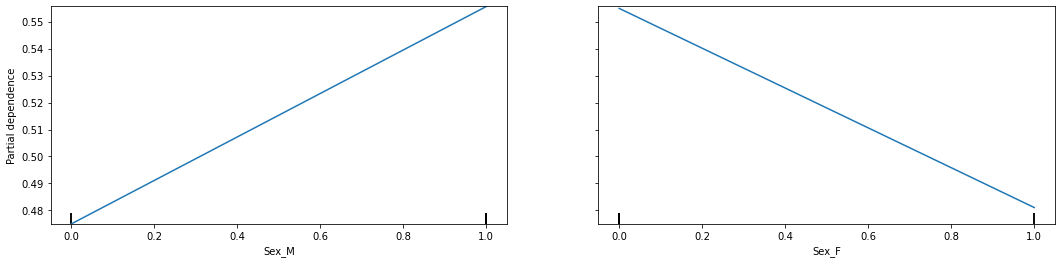

In [152]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train_enc, ['Sex_M', 'Sex_F'], 
                        grid_resolution=20, ax=ax)

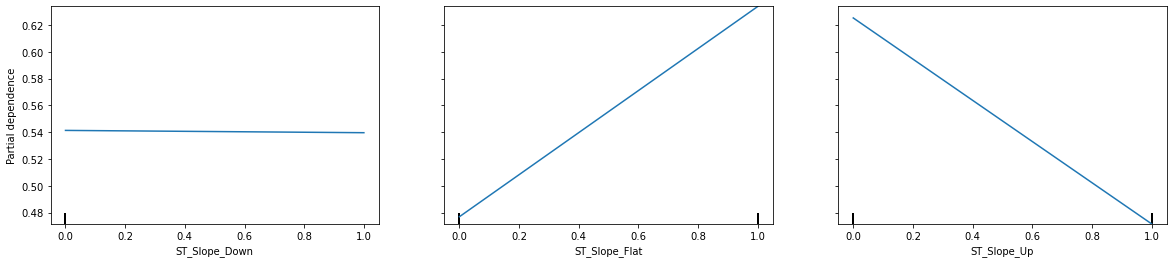

In [153]:
fig, ax = plt.subplots(figsize=(20,4))
plot_partial_dependence(RF_model, X_train_enc, ['ST_Slope_Down', "ST_Slope_Flat", "ST_Slope_Up"], 
                        grid_resolution=20, ax=ax)

"The ST segment is the flat, isoelectric section of the ECG between the end of the S wave (the J point) and the beginning of the T wave."

https://litfl.com/st-segment-ecg-library/

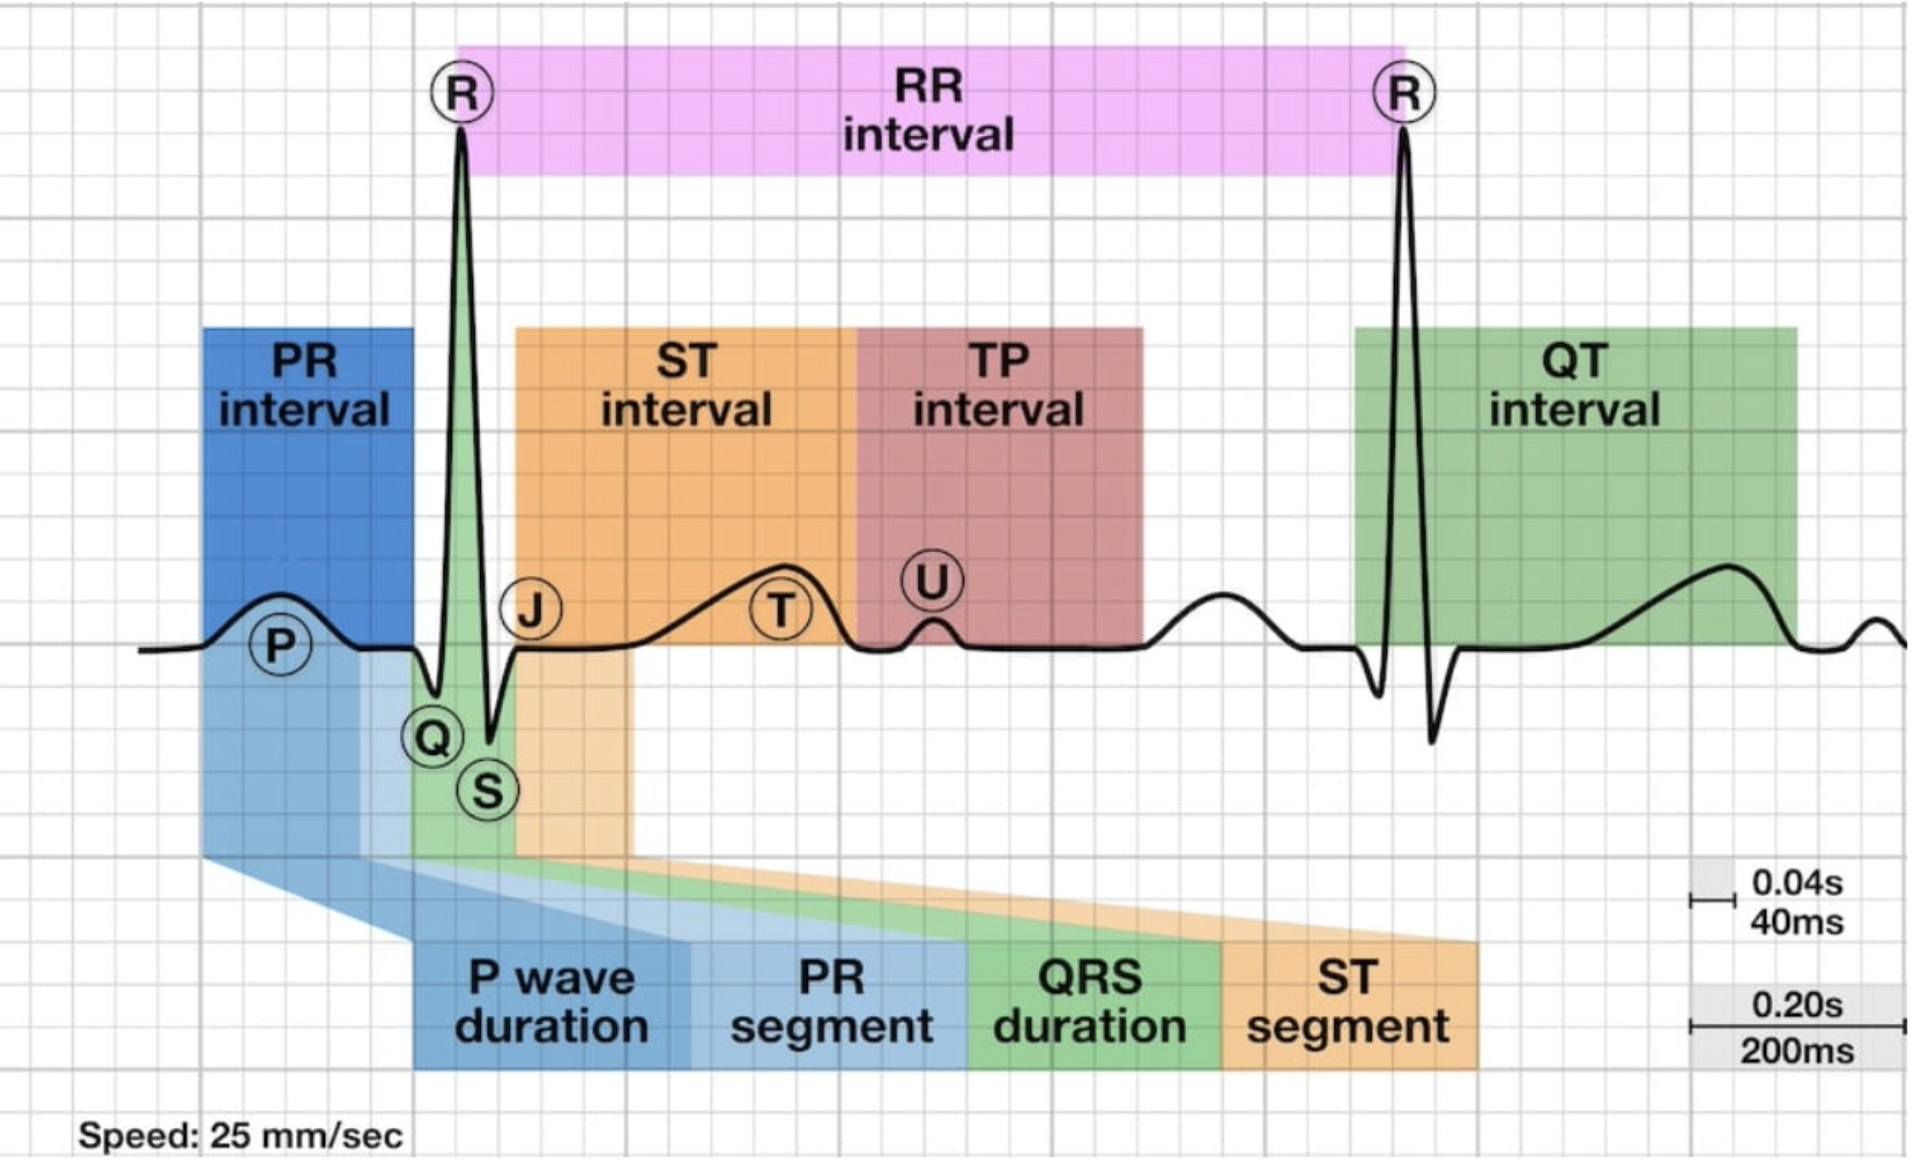

###### Up is bad but much less frequent so when it isn't up and there are heart issues it likely mean it is flat.

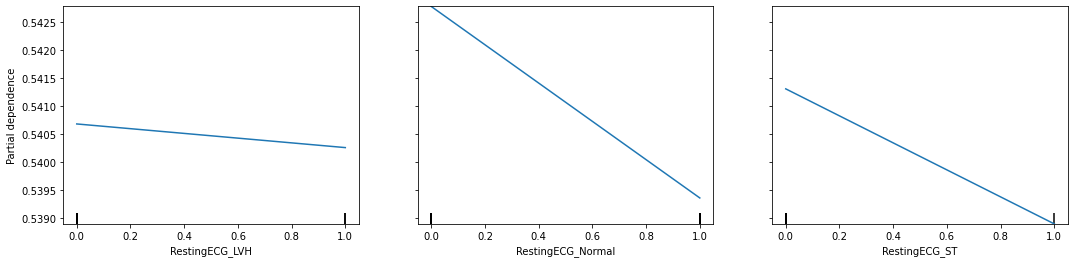

In [154]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train_enc, ['RestingECG_LVH', "RestingECG_Normal", "RestingECG_ST"], 
                        grid_resolution=20, ax=ax)

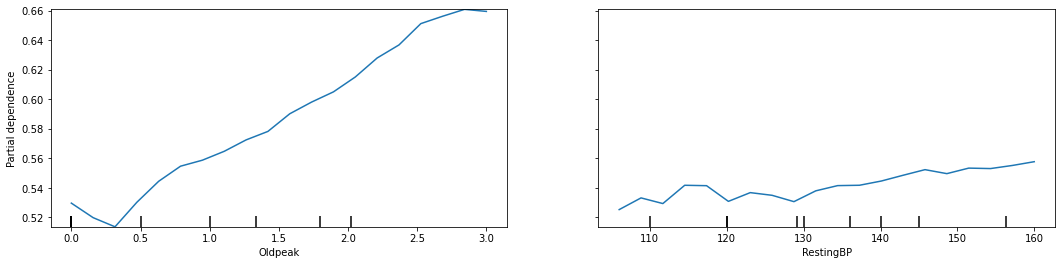

In [155]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train_enc, ['Oldpeak', "RestingBP"], 
                        grid_resolution=20, ax=ax)

## Old Peak

#### Old peak is ST depression induced by exercise related to rest

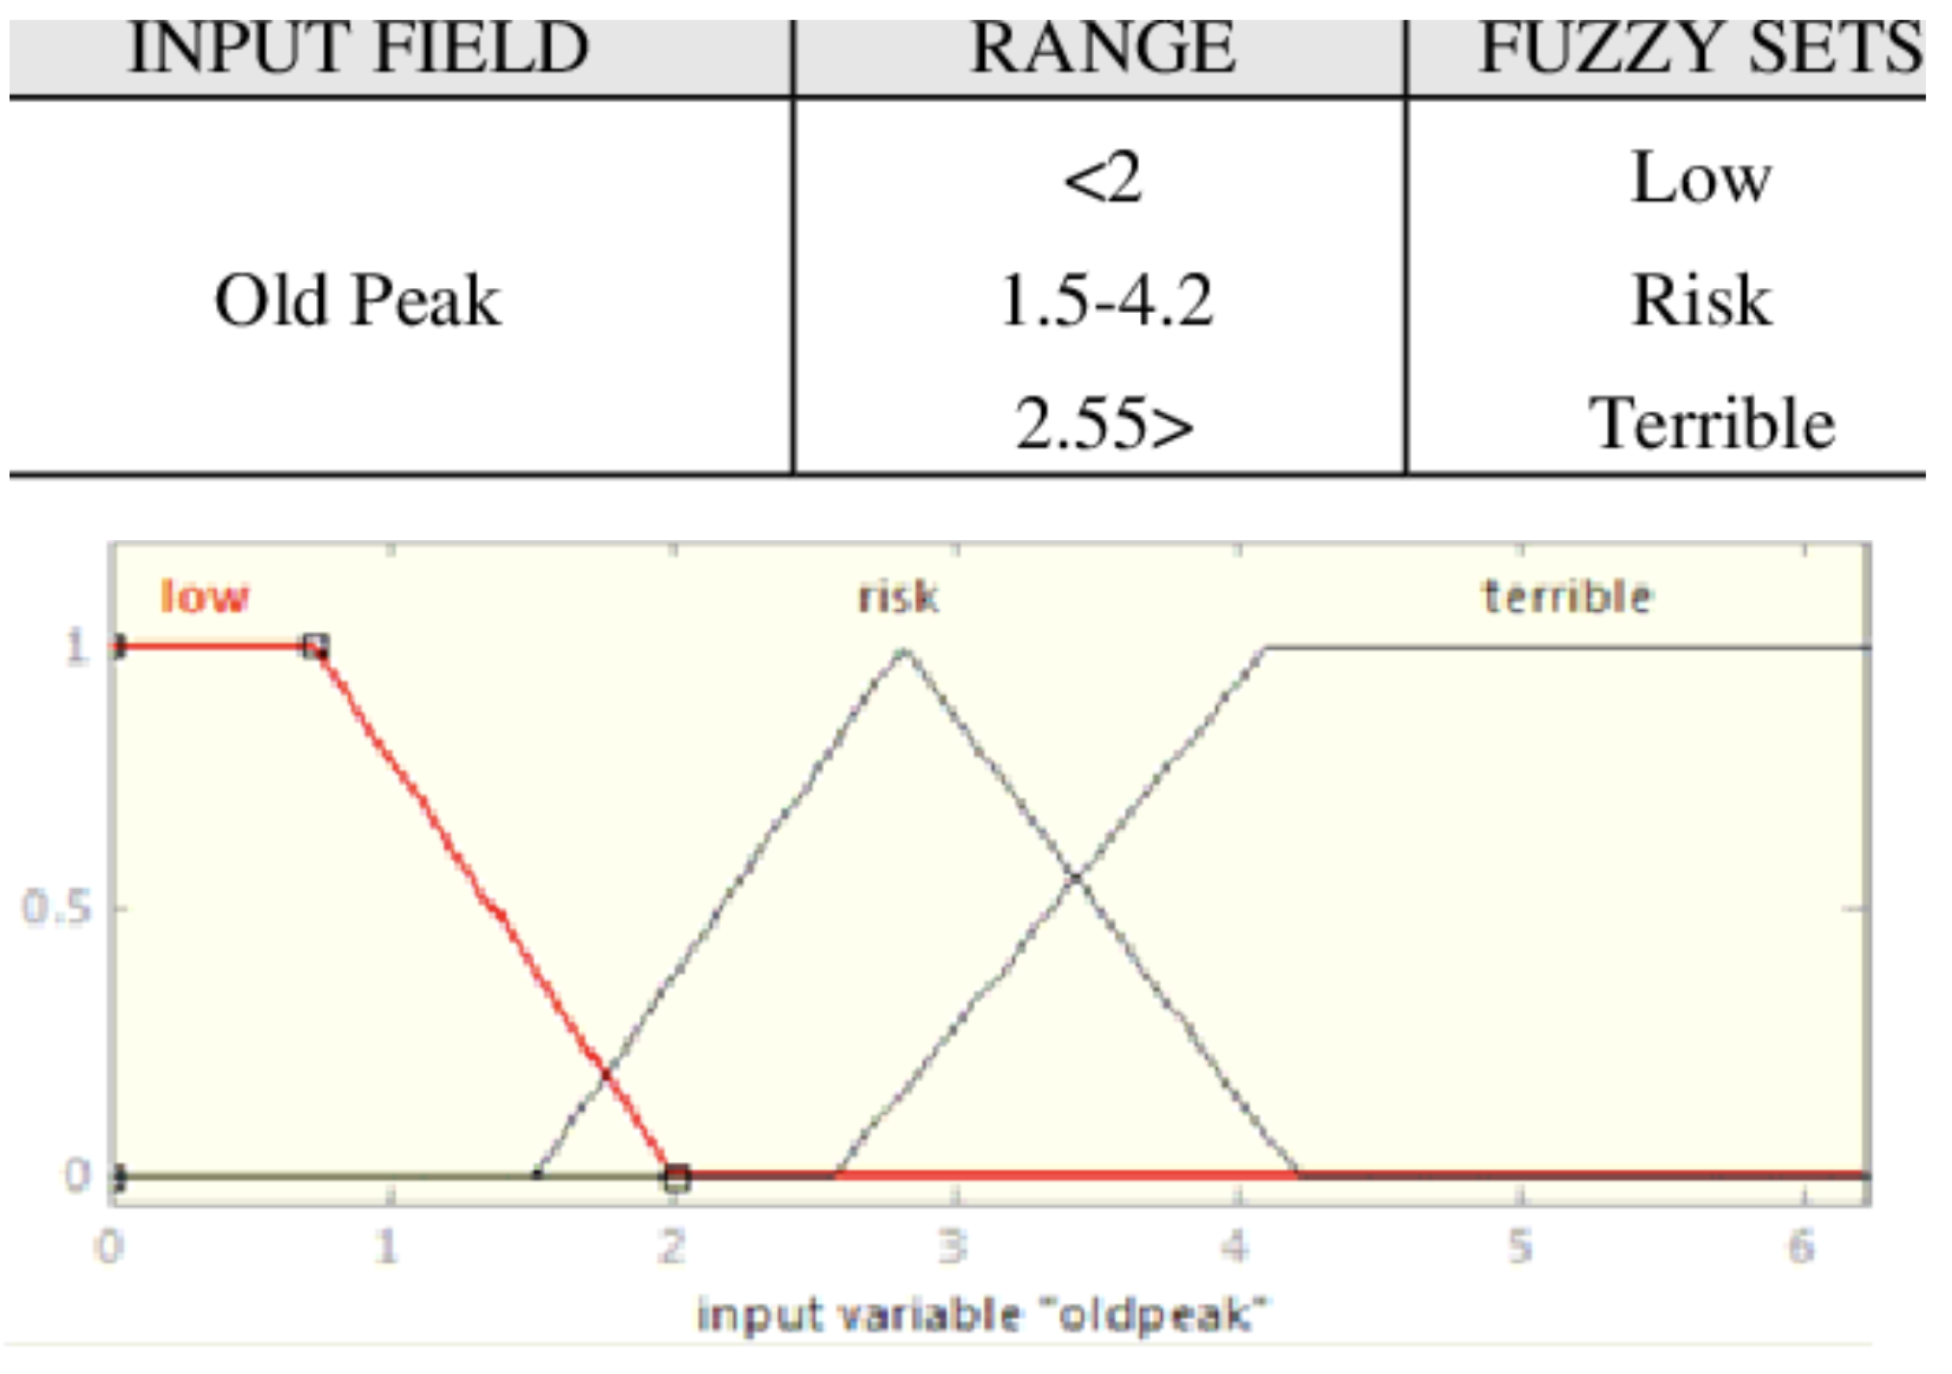

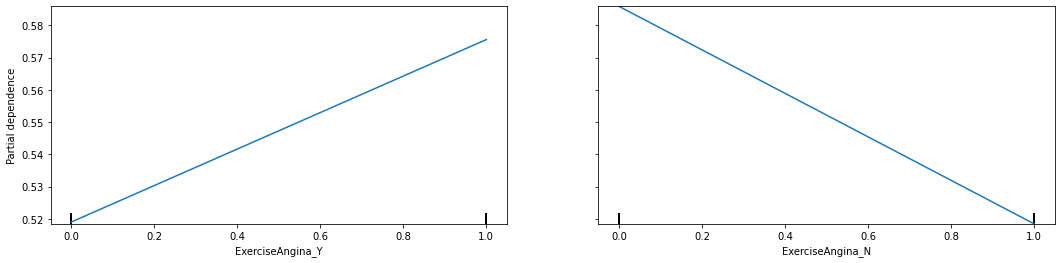

In [35]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train_enc, ['ExerciseAngina_Y', "ExerciseAngina_N"], 
                        grid_resolution=20, ax=ax)

# Heart disease prediction without completing ECG analysis.  

#### Imagine there is a backlog for ECG analysis and an the decision is made to complete a preliminary analysis on patients before determing the next steps.  If we have a patient with high probablity of heart disease based on quick data collection, we would act accordingly.  Contrarily, if we had a patient with very low probablity of heart disease based on quick data collection, we may act differently.  The intention here is to show how this tool could be useful in a fast moving & real life scenario.

In [ ]:
d = {}
d['MaxHR'] = float(input('What is the Max Heart Rate of the patient?').casefold())
d['Age'] = float(input('How old is the patient?').casefold())
d['Sex'] = input('What is the sex of the patient (M or F)?').casefold()
d['RestingBP'] = float(input('What is resting blood pressure reading of the patient?').casefold())
d['Cholesterol'] = float(input('What is the cholesterol reading?').casefold())
d['ExerciseAngina'] = input('Is the patient here for exercise induced angina (Y or N) ?').casefold()
d['FastingBS'] = float(input('What is the fasting blood sugar of the patient? [1: if FastingBS > 120 mg/dl, 0: otherwise]').casefold())
d['ChestPainType'] = input('Describe the chest pain type (make sure to use capital letters): [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]').casefold()

print('~~~~~~~~~~~~~~~~~~~~~~~~~')
print('~~~~~~~~~~~~~~~~~~~~~~~~~')
print('~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Before getting an ECG evaluation on the patient, let's determine the current probability of heart disease")

In [159]:
d

{'MaxHR': 147.0,
 'Age': 59.0,
 'Sex': 'm',
 'RestingBP': 160.0,
 'Cholesterol': 280.0,
 'ExerciseAngina': 'y',
 'FastingBS': 0.0,
 'ChestPainType': 'nap'}

In [160]:
for k,v in d.items():
    if k=='Sex':
        d.update({k: v.upper()})
    if k=='ExerciseAngina':
        d.update({k: v.upper()})
    if k=='ChestPainType':
        d.update({k: v.upper()})

In [161]:
d

{'MaxHR': 147.0,
 'Age': 59.0,
 'Sex': 'M',
 'RestingBP': 160.0,
 'Cholesterol': 280.0,
 'ExerciseAngina': 'Y',
 'FastingBS': 0.0,
 'ChestPainType': 'NAP'}

In [162]:
unseen=pd.DataFrame(d.items(), index=d).T

In [163]:
unseen=unseen.drop([0])

In [164]:
unseen1=unseen.drop(columns=['Sex', 'ExerciseAngina', 'ChestPainType'])

In [165]:
unseen1

,MaxHR,Age,RestingBP,Cholesterol,FastingBS
1,147.0,59.0,160.0,280.0,0.0


I will need to convert the categorical values to numeric values so that the model can run

In [166]:
encoder2 = ce.OneHotEncoder(use_cat_names=True)

In [167]:
encoder2.fit(unseen[['Sex', 'ExerciseAngina', 'ChestPainType']])
unseen_enc = encoder2.transform(unseen[['Sex', 'ExerciseAngina', 'ChestPainType']])

In [168]:
unseen_enc

,Sex_M,ExerciseAngina_Y,ChestPainType_NAP
1,1,1,1


In [169]:
unseen_with_encoding = pd.concat([unseen_enc, unseen1], axis=1, join="inner")

In [170]:
unseen_with_encoding

,Sex_M,ExerciseAngina_Y,ChestPainType_NAP,MaxHR,Age,RestingBP,Cholesterol,FastingBS
1,1,1,1,147.0,59.0,160.0,280.0,0.0


In [171]:
list1=list(unseen_with_encoding.columns.values)

In [172]:
list1

['Sex_M',
 'ExerciseAngina_Y',
 'ChestPainType_NAP',
 'MaxHR',
 'Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS']

In [173]:
sample=X_train_enc

In [174]:
for column in list1:
    sample=sample.drop(columns=column)


In [175]:
sample

,Sex_F,ChestPainType_ASY,ChestPainType_TA,ChestPainType_ATA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,Oldpeak,ST_Slope_Flat,ST_Slope_Up,ST_Slope_Down
852,0,1,0,0,1,0,0,0,2.5,1,0,0
121,1,0,0,0,0,1,0,1,0.0,0,1,0
664,1,1,0,0,1,0,0,1,1.0,1,0,0
187,0,1,0,0,0,1,0,0,1.0,1,0,0
108,0,1,0,0,0,1,0,1,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
767,1,0,0,0,1,0,0,1,0.0,0,1,0
72,0,1,0,0,0,1,0,1,0.0,1,0,0
908,0,1,0,0,1,0,0,0,4.0,0,1,0
235,0,0,0,1,0,1,0,0,1.0,1,0,0


##### Next, I need to create an empty dataframe with all column names present

In [176]:
sample_empty=sample[0:0]

In [177]:
sample_empty

,Sex_F,ChestPainType_ASY,ChestPainType_TA,ChestPainType_ATA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,Oldpeak,ST_Slope_Flat,ST_Slope_Up,ST_Slope_Down


In [178]:
sample_empty1=sample_empty.append(pd.Series(), ignore_index=True)

<ipython-input-178-701b61e1d127>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sample_empty1=sample_empty.append(pd.Series(), ignore_index=True)


In [179]:
sample_empty1=sample_empty1.fillna(0)

In [180]:
sample_empty1

,Sex_F,ChestPainType_ASY,ChestPainType_TA,ChestPainType_ATA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,Oldpeak,ST_Slope_Flat,ST_Slope_Up,ST_Slope_Down
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
unseen_with_encoding

,Sex_M,ExerciseAngina_Y,ChestPainType_NAP,MaxHR,Age,RestingBP,Cholesterol,FastingBS
1,1,1,1,147.0,59.0,160.0,280.0,0.0


In [182]:
merged= unseen_with_encoding.join(sample_empty1)

In [183]:
merged=merged.fillna(0)

In [184]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sex_M              1 non-null      int64  
 1   ExerciseAngina_Y   1 non-null      int64  
 2   ChestPainType_NAP  1 non-null      int64  
 3   MaxHR              1 non-null      float64
 4   Age                1 non-null      float64
 5   RestingBP          1 non-null      float64
 6   Cholesterol        1 non-null      float64
 7   FastingBS          1 non-null      float64
 8   Sex_F              1 non-null      float64
 9   ChestPainType_ASY  1 non-null      float64
 10  ChestPainType_TA   1 non-null      float64
 11  ChestPainType_ATA  1 non-null      float64
 12  RestingECG_LVH     1 non-null      float64
 13  RestingECG_Normal  1 non-null      float64
 14  RestingECG_ST      1 non-null      float64
 15  ExerciseAngina_N   1 non-null      float64
 16  Oldpeak            1 non-null 

In [185]:
merged.columns

Index(['Sex_M', 'ExerciseAngina_Y', 'ChestPainType_NAP', 'MaxHR', 'Age',
       'RestingBP', 'Cholesterol', 'FastingBS', 'Sex_F', 'ChestPainType_ASY',
       'ChestPainType_TA', 'ChestPainType_ATA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'Oldpeak',
       'ST_Slope_Flat', 'ST_Slope_Up', 'ST_Slope_Down'],
      dtype='object')

In [186]:
merged

,Sex_M,ExerciseAngina_Y,ChestPainType_NAP,MaxHR,Age,RestingBP,Cholesterol,FastingBS,Sex_F,ChestPainType_ASY,ChestPainType_TA,ChestPainType_ATA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,Oldpeak,ST_Slope_Flat,ST_Slope_Up,ST_Slope_Down
1,1,1,1,147.0,59.0,160.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Predict heart disease within  existing model

In [187]:
pred_logmodel= logmodel.predict(merged.values)

In [188]:
pred_logmodel

array([0])

In [189]:
if pred_logmodel==1:
    print('This patient has heart disease.')
if 0.74<pred_logmodel<1:
    print('This patient is in high probability of heart disease zone.')
if 0.5<pred_logmodel<=0.74:
    print('It is likely this patient has heart disease but it is still not clear, so further testing shall be pursued.')


In [190]:
pred_logmodel2= logmodel.predict_proba(merged.values)

In [191]:
print("Probablity of heart disease no on left, probability of yes on right")
pred_logmodel2

Probablity of heart disease no on left, probability of yes on right


array([[1.00000000e+00, 6.44349585e-39]])